In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

import pickle

# 2. Modeling

In [2]:
df = pd.read_csv('data/posts_clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   selftext   2097 non-null   object
 1   subreddit  2097 non-null   object
 2   title      2097 non-null   object
dtypes: object(3)
memory usage: 49.3+ KB


In [3]:
df['subreddit'].value_counts()

crossfit        1761
powerlifting     336
Name: subreddit, dtype: int64

In [3]:
X = df['selftext']
y = df['subreddit']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 12)

#### For each of the following models, I will:
1. Make a pipeline that includs CountVectorizer, StandardScaler and a classsfier
2. Throw the pipe in a GridSearchCV with different params
3. Fit the grid
4. Save it to a pickle file for future use

## Logistic Regression

In [6]:
pipe_lr = make_pipeline(CountVectorizer(), StandardScaler(with_mean=False), LogisticRegression())

In [7]:
pipe_lr.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression', LogisticRegression())])>

In [8]:
params_lr = {
    'countvectorizer__stop_words': [None, 'english'],
    'countvectorizer__max_features': [100, 200, 300, 400, 500],
    'countvectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'logisticregression__C': [.0001, .001, .01, .1, 1, 10, 100]
}

In [9]:
grid_lr = GridSearchCV(pipe_lr, param_grid=params_lr, n_jobs=-1)

In [10]:
grid_lr.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_features': [100, 200, 300, 400,
                                                           500],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (2, 2)],
                         'countvectorizer__stop_words': [None, 'english'],
                         'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10, 100]})

In [11]:
grid_lr.best_estimator_

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=200, ngram_range=(1, 2),
                                 stop_words='english')),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression', LogisticRegression(C=0.1))])

In [14]:
pickle.dump(grid_lr, open('models/logistic_recression.pkl', 'wb'))

## KNN

In [15]:
pipe_knn = make_pipeline(CountVectorizer(), StandardScaler(with_mean=False), KNeighborsClassifier())

In [16]:
pipe_knn.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])>

In [17]:
params_knn = {
    'countvectorizer__stop_words': [None, 'english'],
    'countvectorizer__max_features': [100, 200, 300, 400, 500],
    'countvectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11, 15]
}

In [18]:
grid_knn = GridSearchCV(pipe_knn, param_grid=params_knn, n_jobs=-1)

In [19]:
grid_knn.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_features': [100, 200, 300, 400,
                                                           500],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (2, 2)],
                         'countvectorizer__stop_words': [None, 'english'],
                         'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11,
                                                               15]})

In [22]:
pickle.dump(grid_knn, open('models/knn.pkl', 'wb'))

## Naive Bays

In [23]:
pipe_bays = make_pipeline(CountVectorizer(), StandardScaler(with_mean=False), MultinomialNB())

In [24]:
pipe_bays.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('multinomialnb', MultinomialNB())])>

In [25]:
params_bays = {
    'countvectorizer__stop_words': [None, 'english'],
    'countvectorizer__max_features': [100, 200, 300, 400, 500],
    'countvectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'multinomialnb__alpha': [.001, .01, .1, 10, 100]
}

In [26]:
grid_bays = GridSearchCV(pipe_bays, param_grid=params_bays, n_jobs=-1)

In [27]:
grid_bays.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_features': [100, 200, 300, 400,
                                                           500],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (2, 2)],
                         'countvectorizer__stop_words': [None, 'english'],
                         'multinomialnb__alpha': [0.001, 0.01, 0.1, 10, 100]})

In [30]:
pickle.dump(grid_bays, open('models/naive_bays.pkl', 'wb'))

## Decision Tree

In [31]:
pipe_trees = make_pipeline(CountVectorizer(), StandardScaler(with_mean=False), DecisionTreeClassifier())

In [32]:
pipe_trees.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])>

In [33]:
params_trees = {
    'countvectorizer__stop_words': [None, 'english'],
    'countvectorizer__max_features': [100, 200, 300, 400, 500],
    'countvectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'decisiontreeclassifier__max_depth': [3, 5, 7, 9], 
    'decisiontreeclassifier__ccp_alpha': [.0001, .001, .01, .1, 10, 100]
}

In [34]:
grid_trees = GridSearchCV(pipe_trees, param_grid=params_trees, n_jobs=-1)

In [35]:
grid_trees.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_features': [100, 200, 300, 400,
                                                           500],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (2, 2)],
                         'countvectorizer__stop_words': [None, 'english'],
                         'decisiontreeclassifier__ccp_alpha': [0.0001, 0.001,
                                                               0.01, 0.1, 10,
                                                               100],
                         'decisiontreeclassif

In [38]:
pickle.dump(grid_trees, open('models/decision_trees.pkl', 'wb'))

## Random Forest

In [39]:
pipe_random = make_pipeline(CountVectorizer(), StandardScaler(with_mean=False), RandomForestClassifier())

In [40]:
pipe_random.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestclassifier', RandomForestClassifier())])>

In [41]:
params_random = {
    'countvectorizer__stop_words': [None, 'english'],
    'countvectorizer__max_features': [100, 200, 300, 400, 500],
    'countvectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'randomforestclassifier__max_depth': [3, 5, 7, 9], 
    'randomforestclassifier__ccp_alpha': [.0001, .001, .01, .1, 10, 100]
}

In [42]:
grid_random = GridSearchCV(pipe_random, param_grid=params_random, n_jobs=-1)

In [43]:
grid_random.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_features': [100, 200, 300, 400,
                                                           500],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (2, 2)],
                         'countvectorizer__stop_words': [None, 'english'],
                         'randomforestclassifier__ccp_alpha': [0.0001, 0.001,
                                                               0.01, 0.1, 10,
                                                               100],
                         'randomforestclassif

In [46]:
pickle.dump(grid_random, open('models/random_forest.pkl', 'wb'))

## SVM

In [47]:
pipe_svc = make_pipeline(CountVectorizer(stop_words='english'), StandardScaler(with_mean=False), SVC())

In [48]:
pipe_svc.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('svc', SVC())])>

In [49]:
params_scv = {
    'countvectorizer__max_features': [100, 200, 300, 400, 500],
    'countvectorizer__ngram_range': [(1, 2), (2, 2)],
    'svc__kernel': ['rbf', 'linear', 'poly']
}

In [50]:
grid_svc = GridSearchCV(pipe_svc, param_grid=params_scv, n_jobs=-1)

In [51]:
grid_svc.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_features': [100, 200, 300, 400,
                                                           500],
                         'countvectorizer__ngram_range': [(1, 2), (2, 2)],
                         'svc__kernel': ['rbf', 'linear', 'poly']})

In [54]:
grid_svc.best_params_

{'countvectorizer__max_features': 100,
 'countvectorizer__ngram_range': (1, 2),
 'svc__kernel': 'linear'}

In [55]:
pickle.dump(grid_svc, open('models/svm.pkl', 'wb'))

## Gradient Boosting

In [56]:
pipe_gb = make_pipeline(CountVectorizer(stop_words='english'), StandardScaler(with_mean=False), GradientBoostingClassifier())

In [57]:
pipe_gb.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('gradientboostingclassifier', GradientBoostingClassifier())])>

In [58]:
params_gb = {
    'countvectorizer__max_features': [100, 200, 300, 400, 500],
    'countvectorizer__ngram_range': [(1, 2), (2, 2)],
    'gradientboostingclassifier__loss': ['deviance', 'exponential'],
    'gradientboostingclassifier__n_estimators': [20, 40, 60, 80, 100],
#     'gradientboostingclassifier__learning_rate': [0.005, 0.01, 0.1, 1, 3],
    'gradientboostingclassifier__ccp_alpha': [.0001, .001, .01, .1, 1, 10]
}

In [59]:
grid_gb = GridSearchCV(pipe_gb, param_grid=params_gb, n_jobs=-1)

In [60]:
grid_gb.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_features': [100, 200, 300, 400,
                                                           500],
                         'countvectorizer__ngram_range': [(1, 2), (2, 2)],
                         'gradientboostingclassifier__ccp_alpha': [0.0001,
                                                                   0.001, 0.01,
                                                                   0.1, 1, 10],
                         'gradientboostingclassifier__loss': ['deviance',
                                  

In [63]:
grid_gb.best_params_

{'countvectorizer__max_features': 200,
 'countvectorizer__ngram_range': (1, 2),
 'gradientboostingclassifier__ccp_alpha': 0.0001,
 'gradientboostingclassifier__loss': 'exponential',
 'gradientboostingclassifier__n_estimators': 100}

In [64]:
pickle.dump(grid_gb, open('models/gradient_boosting.pkl', 'wb'))

# 3. Model Evaluation

In [5]:
with open('models/decision_trees.pkl', 'rb') as tree:
     grid_tree = pickle.load(tree)

In [6]:
with open('models/gradient_boosting.pkl', 'rb') as gb:
     grid_gb = pickle.load(gb)

In [7]:
with open('models/knn.pkl', 'rb') as knn:
     grid_knn = pickle.load(knn)

In [8]:
with open('models/logistic_recression.pkl', 'rb') as lr:
     grid_lr = pickle.load(lr)

In [9]:
with open('models/naive_bays.pkl', 'rb') as bayes:
     grid_bayes = pickle.load(bayes)

In [10]:
with open('models/random_forest.pkl', 'rb') as forest:
     grid_forest = pickle.load(forest)

In [11]:
with open('models/svm.pkl', 'rb') as svc:
     grid_svc = pickle.load(svc)

In [18]:
# put all the cliassifiers in a dictionary
models = {'Decision Trees': grid_tree,
          'Gradient': grid_gb,
          'KNN': grid_knn,
          'Logistic Regression': grid_lr,
          'Naive Bays': grid_bayes,
          'Random Forest': grid_forest,
          'SVM': grid_svc
          }


In [23]:
# since I care both recall and precision, I'll use f1_score
f1 = [{'train f1': f1_score(y_train, value.predict(X_train), pos_label='crossfit'),
                'test f1': f1_score(y_test, value.predict(X_test), pos_label='crossfit')} for key, value in models.items()]

In [24]:
# convert to a DataFrame and set classfier names as the index of the DataFrame
results_f1 = pd.DataFrame(f1, index=models)

In [31]:
# add a column 'overfit', if test score is no less than than train score, not overfit
results_f1['overfit'] = np.where((results_f1['test f1'] - results_f1['train f1']) >= 0, 'N', 'Y')
# add another column 'score spread' with train score minus test score
results_f1['score spread'] = results_f1['train f1'] - results_f1['test f1']

In [33]:
# and sort by test score and score spread
results_f1.sort_values(by=['test f1', 'score spread'], ascending=False)

,train f1,test f1,overfit,score spread
Gradient,0.964784,0.954048,Y,0.010735
Decision Trees,0.954895,0.945856,Y,0.009039
Random Forest,0.953413,0.942060,Y,0.011353
SVM,0.951965,0.940152,Y,0.011813
Naive Bays,0.944635,0.936508,Y,0.008127
Logistic Regression,0.965771,0.935800,Y,0.029971
KNN,0.924382,0.914826,Y,0.009555


In [78]:
# looks like all of them are overfitting
# gradient boosting performs the best on test and doesn't overfit a lot, and will be my final pick
# check feature importance
feature = pd.DataFrame(grid_gb.best_estimator_.named_steps.gradientboostingclassifier.feature_importances_,
                       index=grid_gb.best_estimator_.named_steps.countvectorizer.get_feature_names(),
                       columns=['importance']
            )

In [80]:
# check the top 5 important keywords
feature.nlargest(5, columns='importance')

,importance
powerlifting,0.277527
bench,0.144171
crossfit,0.128027
deadlift,0.117946
instagram,0.033289


In [34]:
df.loc[df['selftext'].str.contains('bench')]['subreddit'].value_counts(normalize=True)

powerlifting    0.724771
crossfit        0.275229
Name: subreddit, dtype: float64

# 4. Visualization for Slides

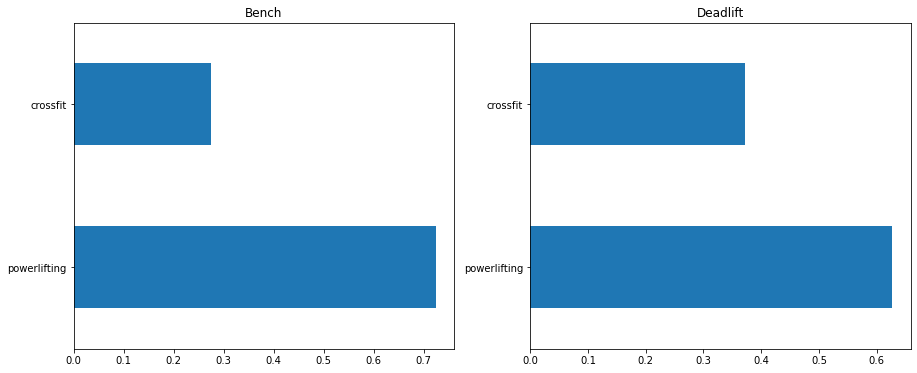

In [73]:
# plot percentage of posts that mention 'bench' and 'deadlift'
# will use the plot in slides
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
df.loc[df['selftext'].str.contains('bench')]['subreddit'].value_counts(normalize=True).plot(kind='barh', grid=False, title='Bench', ax=ax[0])
df.loc[df['selftext'].str.contains('deadlift')]['subreddit'].value_counts(normalize=True).plot(kind='barh', grid=False, title='Deadlift', ax=ax[1]);
plt.savefig('images/bench_deadlift_mention.jpg')

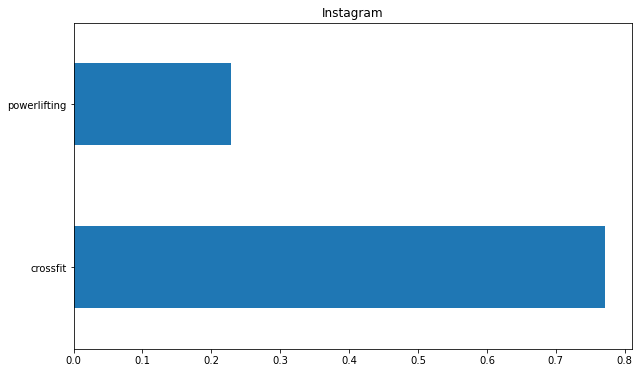

In [76]:
# plot percentage of posts that mention 'Instagram'
# will use the plot in slides
plt.figure(figsize=(10, 6))
df.loc[df['selftext'].str.contains('Instagram')]['subreddit'].value_counts(normalize=True).plot(kind='barh', grid=False, title='Instagram');
plt.savefig('images/Instagram.jpg')